In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import atomphys
from atomphys import Atom, State
from math import pi, sqrt

import pint
_ureg = pint.get_application_registry()

In [3]:
_ureg.epsilon_0

<Unit('vacuum_permittivity')>

In [4]:
ca = Atom.from_nist('Ca+')

Loading atom Ca+
Added 72 states
Added 99 transitions


In [5]:
s0 = ca.states[0]
s0.transitions_to

{}

In [6]:
sx = State('comf', '1S0', "0")

In [7]:
s = ca.states[3]
print(s)
s.Gamma

State(3p6.4p 2P*1/2 0.2296 Ry)


23.968734429639436 <Unit('megahertz')>

In [8]:
s.transitions_to

{State(3p6.4s 2S1/2 0 Ry): Transition(3p6.4s 2S1/2 --> 3p6.4p 2P*1/2 397 nm (E1)),
 State(3p6.3d 2D3/2 0.1244 Ry): Transition(3p6.3d 2D3/2 --> 3p6.4p 2P*1/2 866 nm (E1))}

In [9]:
s.decay_branching_ratios

{State(3p6.4s 2S1/2 0 Ry): 0.9296148738379815,
 State(3p6.3d 2D3/2 0.1244 Ry): 0.0703851261620186}

In [10]:
s.lifetime

6.640106241699867e-09 <Unit('second')>

In [11]:
tr = ca.transitions[1]
tr

Transition(3p6.4s 2S1/2 --> 3p6.4p 2P*1/2 397 nm (E1))

In [12]:
tr.Gamma

22.281692032865347 <Unit('megahertz')>

In [13]:
tr.A

140000000.0 <Unit('1 / second')>

In [14]:
_ureg.epsilon_0

<Unit('vacuum_permittivity')>

In [15]:
_ureg.hbar

<Unit('dirac_constant')>

In [6]:
from atomphys.calc import matrix_element as mx

A = tr.A
wl = tr.wavelength
mx.reduced_dipole_matrix_element(A, wl, tr._ureg).to('e a0')

NameError: name 'tr' is not defined

In [ ]:
mx.reduced_quadrupole_matrix_element(A, wl, tr._ureg).to('e a0**2')


2866.049631779207 <Unit('bohr ** 2 * elementary_charge')>

In [7]:
from atomphys.electric_field import PlaneWaveElectricField
import numpy as np

In [8]:
efield = PlaneWaveElectricField(10, (1, 0, 0), (0, 0, 1), 729)

In [9]:
x = np.linspace(0, 20) * _ureg('nm')

In [10]:
efield.field(x, 0, 0).shape

(50, 3)

In [11]:
efield._phase([0, 0, 0])

(1+0j) <Unit('dimensionless')>

In [12]:
efield.gradient(x, 0, 0).shape

(50, 3, 3)

In [13]:
efield.wavevector

Magnitude,[0.0 0.0 8618909.88639175]
Units,1/m


In [14]:
e2 = PlaneWaveElectricField(10, (1, 0, 0), (0, 0, -1), 729)

ee = efield + e2



In [16]:
alpha = np.deg2rad(37)

standing_wave = PlaneWaveElectricField(10, (0, 1, 0), (np.sin(alpha), 0, np.cos(alpha)), 729) + \
    PlaneWaveElectricField(10, (0, 1, 0), (-np.sin(alpha), 0, np.cos(alpha)), 729)


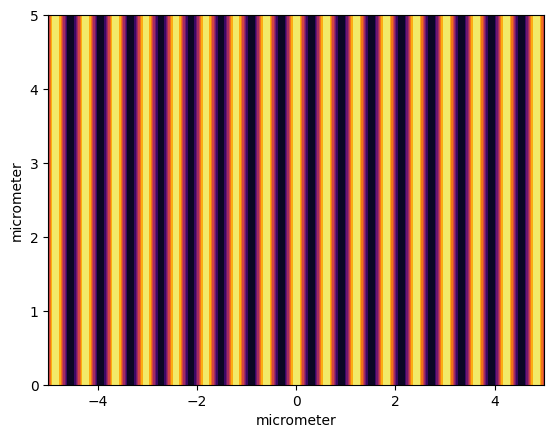

In [27]:
import matplotlib.pyplot as plt
_ureg.setup_matplotlib()

x = np.linspace(-5, 5, 500) * _ureg('um')
z = np.linspace(0, 5, 500) * _ureg('um')

X, Z = np.meshgrid(x, z)

E = standing_wave.field(X, 0, Z)

# plt.plot(z, abs(E[..., 1])**2)
plt.contourf(X, Z, abs(E[..., 1])**2, cmap='inferno')


In [21]:
standing_wave.gradient(X, 0, Z).shape


(500, 500, 3, 3)

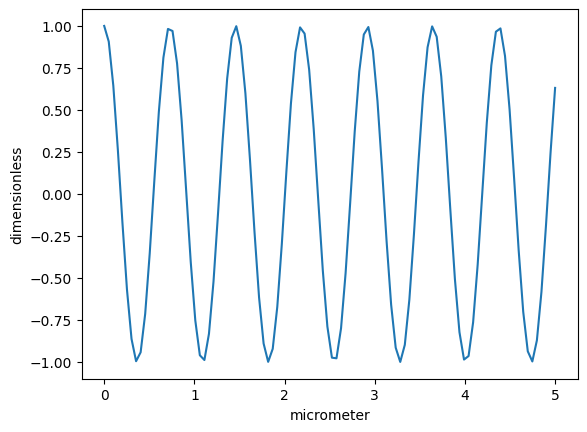

In [124]:
p = efield.phase(0, 0, z)
plt.plot(z, p.real)

In [45]:
import numpy as np

C = np.random.randn(3, 3)
C

array([[-0.05286086, -0.11038127, -2.18087252],
       [ 0.84658337,  0.28754204, -0.16786486],
       [-0.64861791,  0.15875796, -0.0843467 ]])

In [48]:
np.einsum('ij,ij', efield.gradient(), efield.gradient().conj())

(7428560762974143+0j) <Unit('volt ** 2 / meter ** 4')>

In [27]:
from atomphys.calc.wigner import wigner_3j
from atomphys.calc.angular_momentum import magnetic_sublevels

In [28]:
magnetic_sublevels(3/2)

[-1.5, -0.5, 0.5, 1.5]

In [33]:
J1 = 1/2
J2 = 5/2

m1 = -1/2
m2s = magnetic_sublevels(J2)

J = 1
print("J = 1")
for m2 in m2s:
    m = m2 - m1
    w = wigner_3j(J1, J, J2, m1, m, -m2)
    print(m2, m, w)

print()
J = 2
print("J = 2")
for m2 in m2s:
    m = m2 - m1
    w = wigner_3j(J1, J, J2, m1, m, -m2)
    print(m2, m, w)


J = 1
-2.5 -2.0 0
-1.5 -1.0 0
-0.5 0.0 0
0.5 1.0 0
1.5 2.0 0
2.5 3.0 0

J = 2
-2.5 -2.0 0.40824829046386296
-1.5 -1.0 -0.36514837167011077
-0.5 0.0 0.31622776601683794
0.5 1.0 -0.2581988897471611
1.5 2.0 0.18257418583505539
2.5 3.0 0
